In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
housing = pd.read_csv('housing.csv')

In [79]:
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [80]:
features = housing.drop('MEDV', axis = 1)
prices = housing['MEDV']

In [81]:
max(prices)

1024800.0

In [82]:
# TODO: Minimum price of the data
minimum_price = prices.min()
# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()
# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))


Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


Question 1 - Feature Observation

Answer: 
-RM: increase of RM will increase MEDV, because usually an increase of room number implies increase of area and land, therefore increase of the house price
-LSTAT: increase of LSTAT will decrease MEDV, becase "lower class" people tend to live in a cheaper property.
-PTRATIO: increase of PTRATIO will decrease MEDV, because good schools usually have low ratio and high ratio implies a not so good school district, will impact the housing price.

In [83]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [84]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2)

# Success
print ("Training and testing split was successful.")
print (X_train.shape)

Training and testing split was successful.
(391, 3)


In [85]:
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit,train_test_split
def ModelLearning(X,y):
    cv = ShuffleSplit(X.shape[0],n_iter = 10,test_size = 0.2,random_state = 0)
    train_sizes = np.rint(np.linspace(1,X.shape[0]*0.8-1,9)).astype(int)
    fig = plt.figure(figsize = (10,7))
    for k, depth in enumerate([1,3,6,10]):
        regressor = DecisionTreeRegressor(max_depth = depth)
        size,train_scores, test_scores = curves.learning_curve(regressor,X,y,cv = cv,train_sizes = train_sizes,scoring = 'r2')
        train_std = np.std(train_scores,axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.std(test_scores,axis = 1)
        ax = fig.add_subplot(2,2,k+1)
        ax.plot(size,train_mean,'o-',color = 'r',label = 'Training Score')
        ax.plot(size, test_mean,'o-',color = 'g',label = 'Testing Score')
        ax.fill_between(size,train_mean - train_std, train_mean+train_std,alpha = 0.15,color = 'r')
        ax.fill_between(size, test_mean-test_std, test_mean+test_std,alpha = 0.15,color = 'g')
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0,X.shape[0]*0.8])
        ax.set_ylim([-0.05,1.05])
        
    ax.legend(bbox_to_anchor=(1.05,2.05),loc = 'lower left',borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performance',fontsize = 16,y = 1.03)
    fig.tight_layout()
    fig.show()

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


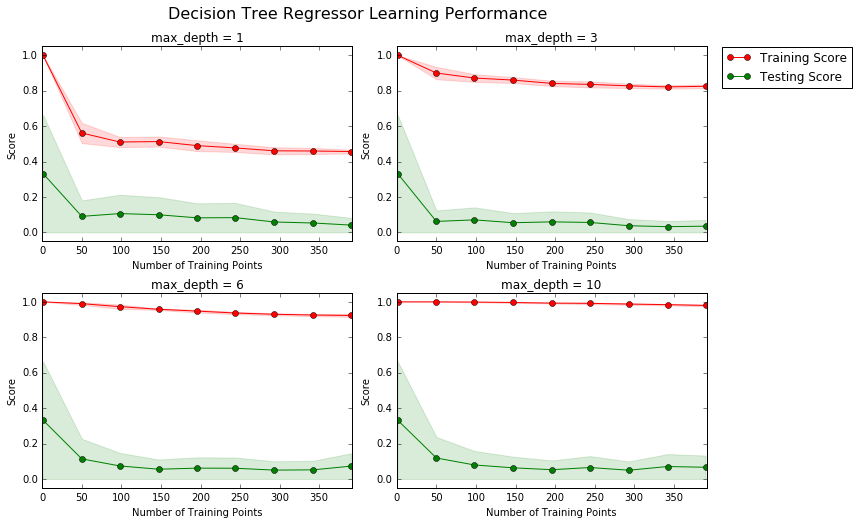

In [86]:
ModelLearning(features,prices)

In [87]:
def ModelComplexity(X,y):
    cv = ShuffleSplit(X.shape[0],n_iter = 10,test_size = 0.2, random_state = 0)
    max_depth = np.arange(1,11)
    train_scores,test_scores = curves.validation_curve(DecisionTreeRegressor(),X,y,param_name='max_depth',param_range = max_depth,cv = cv,scoring = 'r2')
    train_mean = np.mean(train_scores,axis = 1)
    test_mean = np.mean(test_scores,axis = 1)
    train_std = np.std(train_scores,axis = 1)
    test_std = np.std(test_scores,axis = 1)
    plt.figure(figsize=(7,5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth,train_mean,'o-',color = 'r',label = 'Training Score')
    plt.plot(max_depth,test_mean,'o-',color = 'g',label = 'Testing Score')
    plt.fill_between(max_depth,train_mean-train_std,train_mean+train_std,alpha = 0.15,color = 'r')
    plt.fill_between(max_depth,test_mean-test_std,test_mean+test_std,alpha = 0.15, color = 'g')
    
    plt.legend(loc = 'low right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

//anaconda/lib/python3.5/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "low right". Falling back on "best"; valid locations are
	center right
	center left
	lower left
	lower right
	best
	upper left
	center
	right
	upper right
	lower center
	upper center

  six.iterkeys(self.codes))))


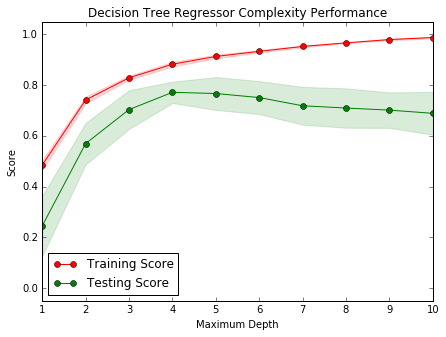

In [88]:
ModelComplexity(X_train,y_train)

In [89]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator=regressor,param_grid=params, scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [90]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [91]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $417,657.69
Predicted selling price for Client 2's home: $226,840.38
Predicted selling price for Client 3's home: $887,040.00


In [92]:
def PredictTrail(X,y,fitter,data):
    price = []
    for k in range(10):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = k)
        reg = fitter(X_train,y_train)
        pred = reg.predict([data[0]])[0]
        price.append(pred)
        print ('Trial {}:${:,.2f}'.format(k+1,pred))
    print('\nRang in price: ${:,.2f}'.format(max(price)-min(price)))
               

In [93]:
PredictTrail(features,prices,fit_model,client_data)

Trial 1:$391,183.33
Trial 2:$419,700.00
Trial 3:$415,800.00
Trial 4:$420,622.22
Trial 5:$418,377.27
Trial 6:$411,931.58
Trial 7:$399,663.16
Trial 8:$407,232.00
Trial 9:$351,577.61
Trial 10:$413,700.00

Rang in price: $69,044.61
